# Cohort 4 Screening Task
## Task 1 

Design a quantum circuit that considers as input the following vector of integers numbers: 

[1,5,7,10]

returns a quantum state which is a superposition of indices of the target solution, obtaining in the output the indices of the inputs where two adjacent bits will always have different values. In this case the output should be: 1/sqrt(2) * (|01> + |11>), as the correct indices are 1 and 3.

1 = 0001

5 = 0101

7 = 0111

10 = 1010

The method to follow for this task is to start from an array of integers as input, pass them to a binary representation and you need to find those integers whose binary representation is such that two adjacent bits are different. Once you have found those integers, you must output a superposition of states where each state is a binary representation of the indices of those integers.

### Example 1
Consider the vector [1,5,4,2]

Pass the integer values to binary numbers that is [001,101,100,010]
 Identifies which values whose binary representation is such that two adjacent bits are different, we can see that are 2 101 and 010, [001,101,100,010].
Returns the linear combination of the indices in which the values satisfying the criterion are found.

Indices:

   0     1      2  	3

   |       |      |      |

[001,101,100,010]

Indices are converted to binary states

|00> |01> |10> |11>

|         |	      | 	 |

[001,101,100,010]

 The answer would be the superposition of the states |01> and |11> or 1/sqrt(2) * (|01> + |11>)

### Context
If you’re struggling to find a proper way to solve this task, you can find some suggestions for a possible solution below. This is one way to approach the problem, but other solutions may be feasible as well, so feel free to also investigate different strategies if you see fit!

The key to this task is to use the superposition offered by quantum computing to load all the values of the input array on a single quantum state, and then locate the values that meet the target condition. So, how can we use a quantum computer to store multiple values? A possible solution is using the QRAM (some references: https://arxiv.org/pdf/0708.1879.pdf, https://github.com/qsharp-community/qram/blob/master/docs/primer.pdf).

As with classical computers, in the QRAM information is accessed using a set of bits indicating the address of the memory cell, and another set for the actual data stored in the array. 

For example, if you want to use a QRAM to store 2 numbers that have at most 3 bits, it can be achieved with 1 qubit of address and 3 qubits of data.
Suppose you have the vector input_2 = [2,7].

In a properly constructed circuit, when the value of the address qubit is |0> the data qubits have value 010 (binary representation of 2) and when it is |1> in the data qubits have value 111 (binary representation of 7).

Given such a structure, you should be able to use Grover’s algorithm in order to obtain the solution to the task.

You can assume that the input always contains at least two numbers that have alternating bitstrings.


### Step 1:
2 Functions below for the purpose of following
  - **d2b** function is for the purpose for converting the input decimal value to the binary value.
  - **altbits** function is for the purpose for verifying wether the input binary number has adjacent 2 bits are different.

In [1]:
def d2b(N):
  b = 0
  cnt = 0
  while (N!= 0):
    rem = N % 2
    c= pow(10, cnt) 
    b=b+ rem*c
    N = N// 2
    cnt+=1
  return b

def altbits(s):
  for i in range(0, len(s)-1): 
    if (s[i] == s[i + 1]) :
       return False
  return True

### Step 2:
Below code is for the purpose of taking input vector from the User, finding the target indices for which there need to be superposition applied.

In [2]:
Input_vector = list(map(int,input("Enter the Input Vector: ").split()))

ln=len(str(d2b (max(Input_vector))))
j = []
m = []

for i in Input_vector:
  z=str(d2b(i))
  if len(z)!=ln:
    z = ('0'*(ln-len(z))+z)
  j.append(z) 

target_indices = []
for cnt,i in enumerate(j):
  if (altbits(i)):
    target_indices.append(cnt)

print("The Indices for which superposition need to be applied: ",target_indices)

Enter the Input Vector: 1 5 7 10
The Indices for which superposition need to be applied:  [1, 3]


### Step 3:
Below code is for 
- Importing necessary Libraries.
- Initializing the Quantum Circuit with Quantum_Registers, Classical_Registers.
- Draw the Circuit.

In [3]:
%matplotlib inline

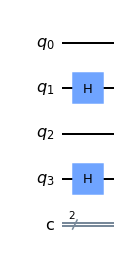

In [4]:
from qiskit import *

Quantum_Registers = len(Input_vector)
Classical_Registers = len(target_indices)

#Initializing the circuit
qc = QuantumCircuit(Quantum_Registers, Classical_Registers)

#Applying the superposition at the target indices
qc.h(target_indices)

#Drawing the Circuit
qc.draw(output='mpl')

### Step 4:
Below code is for 
- Importing necessary Libraries.
- Measuring at the end of hadamard gate(h).
- Drawing the Circuit resulted.

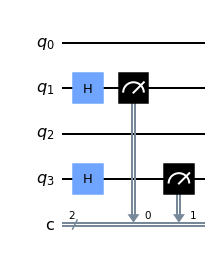

In [5]:
from qiskit.visualization import plot_histogram
k = list(range(Classical_Registers))

qc.measure(target_indices,k)
qc.draw(output='mpl')

### Step 5:
Below code is for

- Initializing the Simulator.
- Starting the Job for executing the quantum circuit for the experiment for a certain no of times.
- Ploting the histogram of the Probabilities

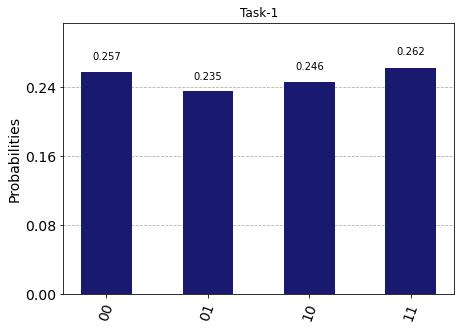

In [6]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Task-1")

### Additional experiments done for representing results in various visualization plots

In [7]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [8]:
# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') 
result = backend.run(transpile(qc, backend)).result()
psi  = result.get_statevector(qc)

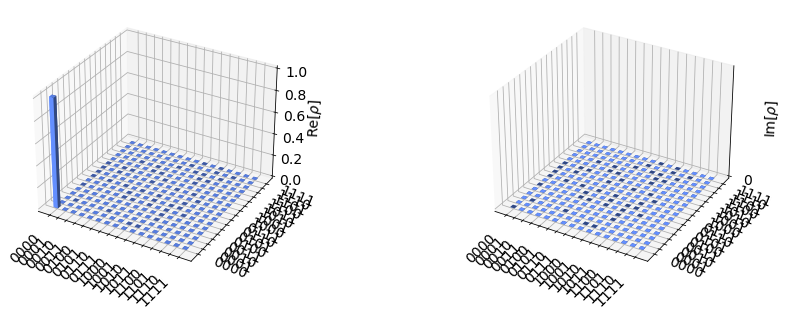

In [9]:
plot_state_city(psi)

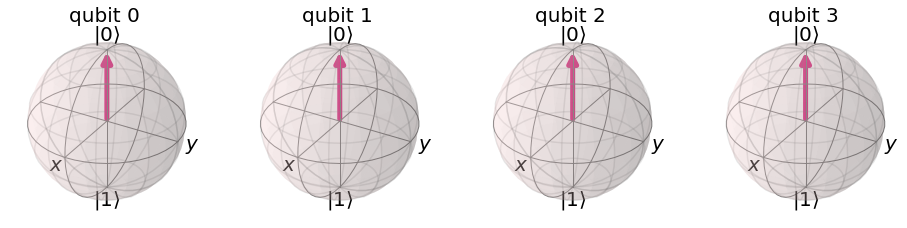

In [10]:
plot_bloch_multivector(psi)

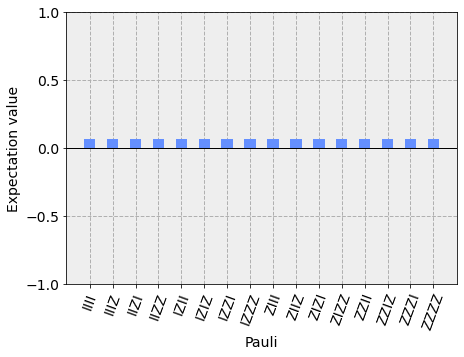

In [11]:
plot_state_paulivec(psi)

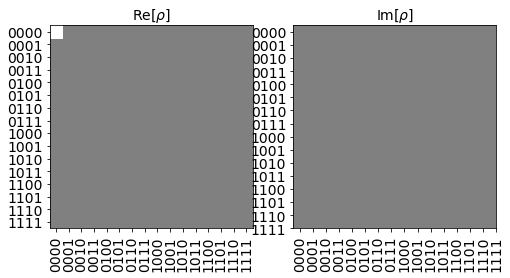

In [12]:
plot_state_hinton(psi)

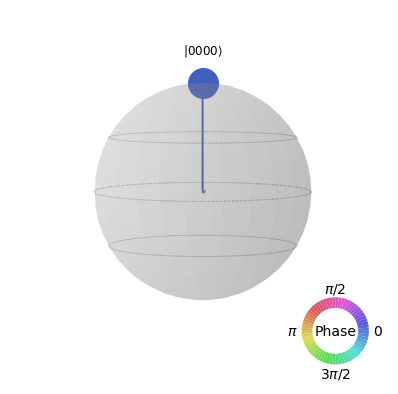

In [13]:
plot_state_qsphere(psi)

## Bonus
Design a general circuit that accepts vectors with random values of size 2^n with m bits in length for each element and finds the state(s) indicated above from an oracle.

### Solution:

***Note: Maximum Number of qubits is (24) for "qasm_simulator" , so choose n<5 for below experiment***

In [20]:
import numpy as np

n = int(input("Enter the value of n for which the vector length resulting should be 2^n: "))
m = int(input("Enter the value of m for which, m bits is length for each element: "))

Input_vector_length = 2**n
m_min = 2**(m-1)
m_max = 2**(m) - 1 

Random_Input_Vector = np.random.randint(low=m_min, high=m_max, size=Input_vector_length)
print("Random vector generated through the given details: ",Random_Input_Vector)

Enter the value of n for which the vector length resulting should be 2^n: 3
Enter the value of m for which, m bits is length for each element: 3
Random vector generated through the given details:  [4 4 6 4 6 5 5 4]


The Indices for which superposition need to be applied:  [5, 6]


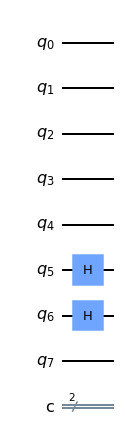

In [21]:
#Following the same above approach for generating the circuit
Input_vector = Random_Input_Vector

ln=len(str(d2b (max(Input_vector))))
j = []
m = []

for i in Input_vector:
  z=str(d2b(i))
  if len(z)!=ln:
    z = ('0'*(ln-len(z))+z)
  j.append(z) 

target_indices = []
for cnt,i in enumerate(j):
  if (altbits(i)):
    target_indices.append(cnt)

print("The Indices for which superposition need to be applied: ",target_indices)

Quantum_Registers = len(Input_vector)
Classical_Registers = len(target_indices)

#Initializing the circuit
qc = QuantumCircuit(Quantum_Registers, Classical_Registers)

#Applying the superposition at the target indices
qc.h(target_indices)

#Drawing the Circuit
qc.draw(output='mpl')

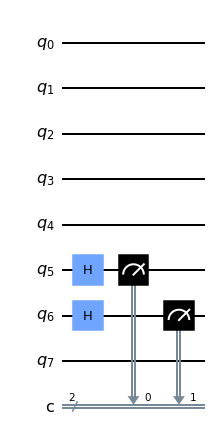

In [22]:
from qiskit.visualization import plot_histogram
k = list(range(Classical_Registers))

qc.measure(target_indices,k)
qc.draw(output='mpl')

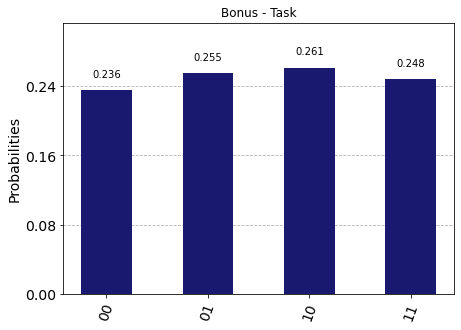

In [23]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Bonus - Task")

The above solution provided is an attempt tried to present to the best of the understandings found in the question.

## References

- https://qiskit.org/textbook/preface.html
- https://qiskit.org/documentation/
- https://github.com/Qiskit/qiskit-tutorials